## Kickstarter Project Exploration

Explore cancer projects from Kickstarter

In [1]:
import os.path as op

import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_PROCESSED = '../data/processed'

In [43]:
data = pd.read_csv(op.join(DATA_PROCESSED, 'cancer_projects_full.csv'))

data.sample(3)

,id,name,blurb,created,launched,deadline,goal,spotlight,staff_pick,status,status_changed_at,backers,usd_pledged,pledged,currency,current_currency,category,geo_country,geo_state,geo_type,url,text,mean_donation,text_length_words,text_length_sentences,pledged_to_goal,duration,duration_float,month,day_of_week,year,from_US,from_Town,blurb_length_words,battle_metaphor,journey_metaphor,battle_uniques,journey_uniques,battle_salience,journey_salience,battle_productivity,journey_productivity,dominant_battle,dominant_journey,dominant_both,dominant_neither,dominant
160,243027313,Team of women make film based on true story ca...,"With ""Maria my love"" tattooed on her wrist, ac...",1251726646,1252507879,1257094740,10000,True,False,1,1257094810,96,10600.22,10600.22,USD,USD,film & video,US,NY,Town,https://www.kickstarter.com/projects/jasminemc...,We are a team of women filmmakers whose first ...,110.418958,1386,54,1.060022,4586861,53.088669,9,2,2009,1,1,27,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,Neither
165,1253964998,The Materiality of Impermanence,An evening-length dance piece inspired by my j...,1286766140,1286937119,1292124719,3000,True,False,1,1292125510,67,4891.00,4891.00,USD,USD,dance_theater,US,TX,Town,https://www.kickstarter.com/projects/205522799...,"My life changed forever on January 8th, 2010. ...",73.000000,392,19,1.630333,5187600,60.041667,10,2,2010,1,1,14,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,Neither
90,1419934045,Twice Two Makes Four,"A story about the Hawthorne's, a couple strugg...",1326231505,1327388690,1329980690,20000,True,False,1,1329980690,73,20635.00,20635.00,USD,USD,film & video,US,MA,Town,https://www.kickstarter.com/projects/twicetwom...,*The footage above is only meant to provide a ...,282.671233,369,19,1.031750,2592000,30.000000,1,1,2012,1,1,19,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,Neither


In [44]:
data.shape

(409, 47)

Clean out projects not classified as Success or Fail

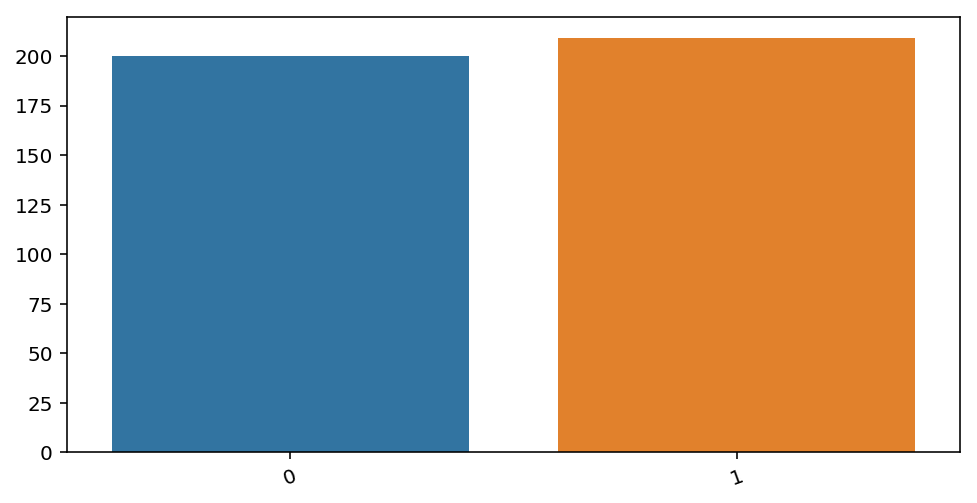

In [45]:
cnt = data['status'].value_counts()
plt.subplots(figsize=(8,4))
sns.barplot(cnt.index, cnt.values)
plt.xticks(rotation=20);

### Country of Origin

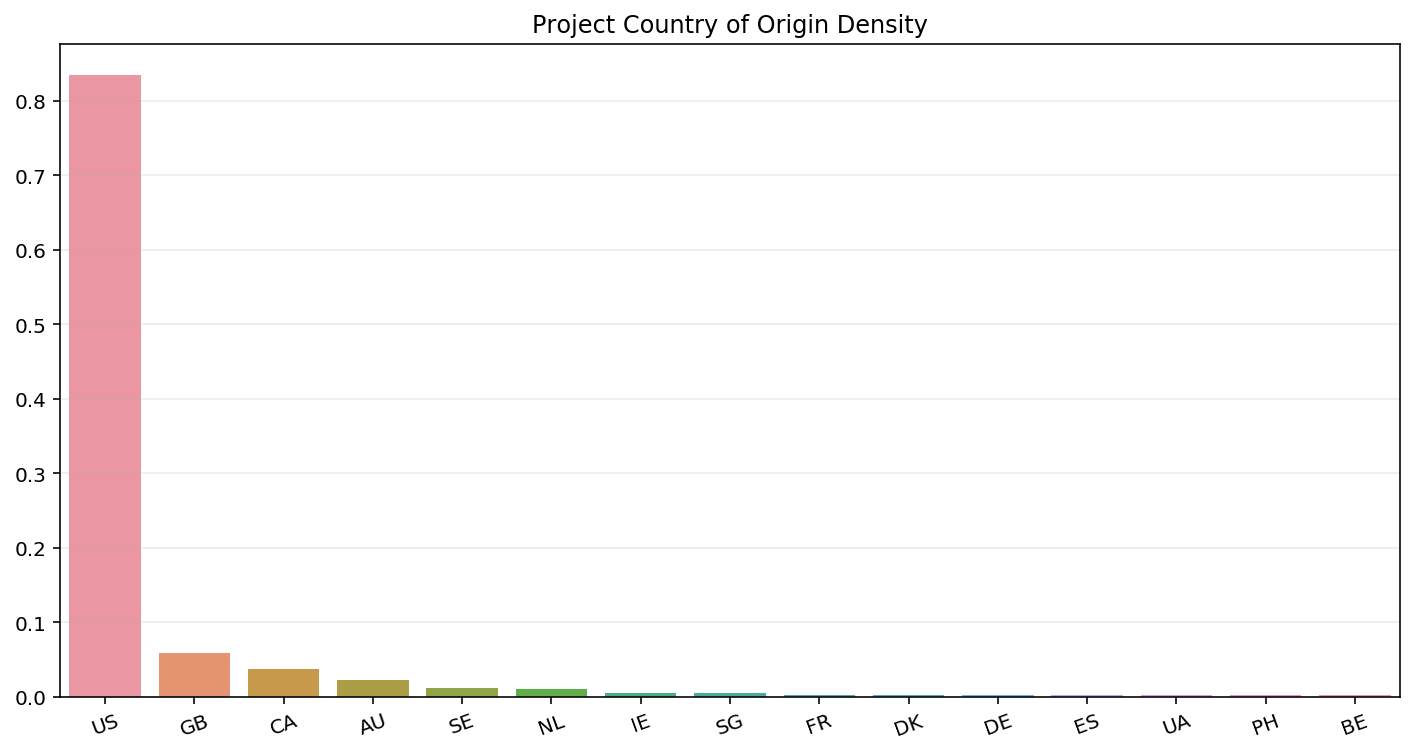

In [46]:
cnt = data['geo_country'].value_counts()
plt.subplots(figsize=(12,6))
sns.barplot(cnt.index, cnt.values / len(data))
plt.xticks(rotation=20)
plt.grid(alpha=0.25, axis='y')
plt.title('Project Country of Origin Density');

### Parent Project Categories

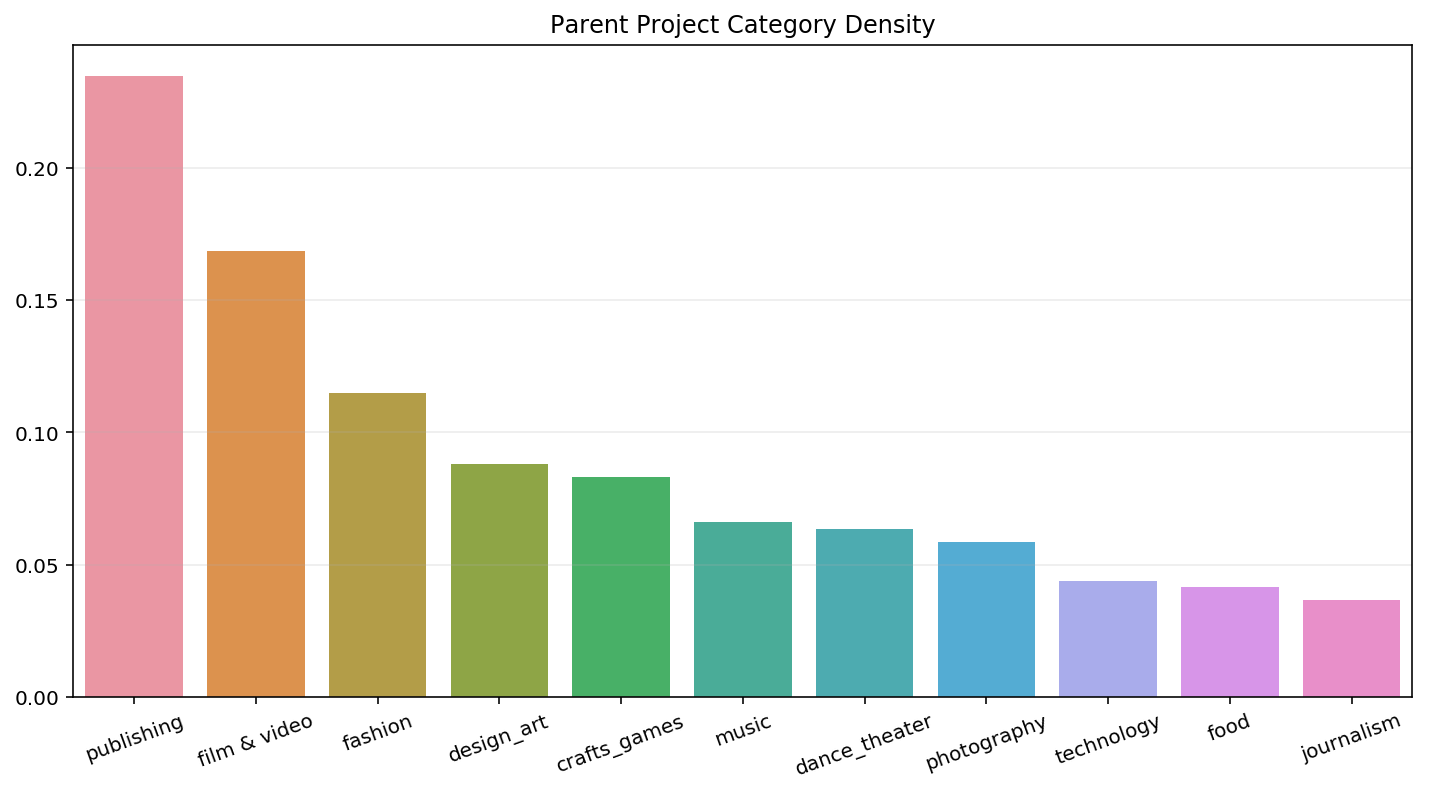

In [47]:
cnt = data['category'].value_counts()
plt.subplots(figsize=(12,6))
sns.barplot(cnt.index, cnt.values / len(data))
plt.xticks(rotation=20)
plt.grid(alpha=0.25, axis='y')
plt.title('Parent Project Category Density');

### Geo Types

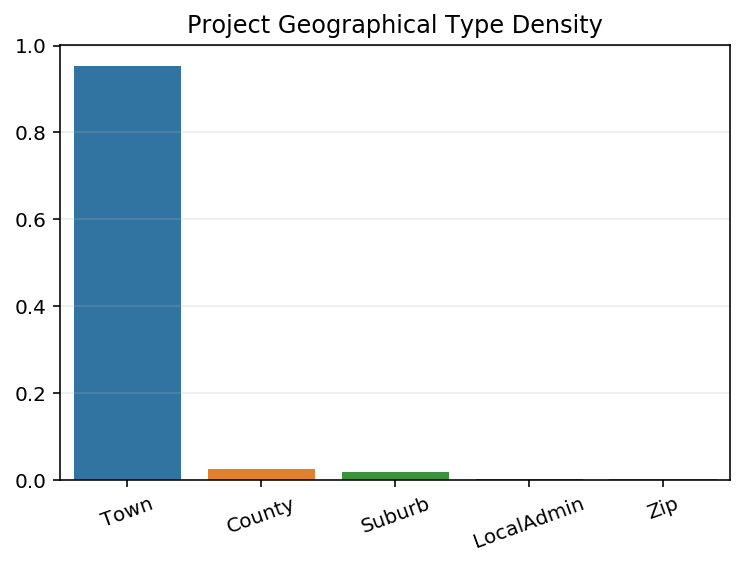

In [8]:
cnt = data['geo_type'].value_counts()
sns.barplot(cnt.index, cnt.values / len(data))
plt.xticks(rotation=20)
plt.grid(alpha=0.25, axis='y')
plt.title('Project Geographical Type Density');

### Duration

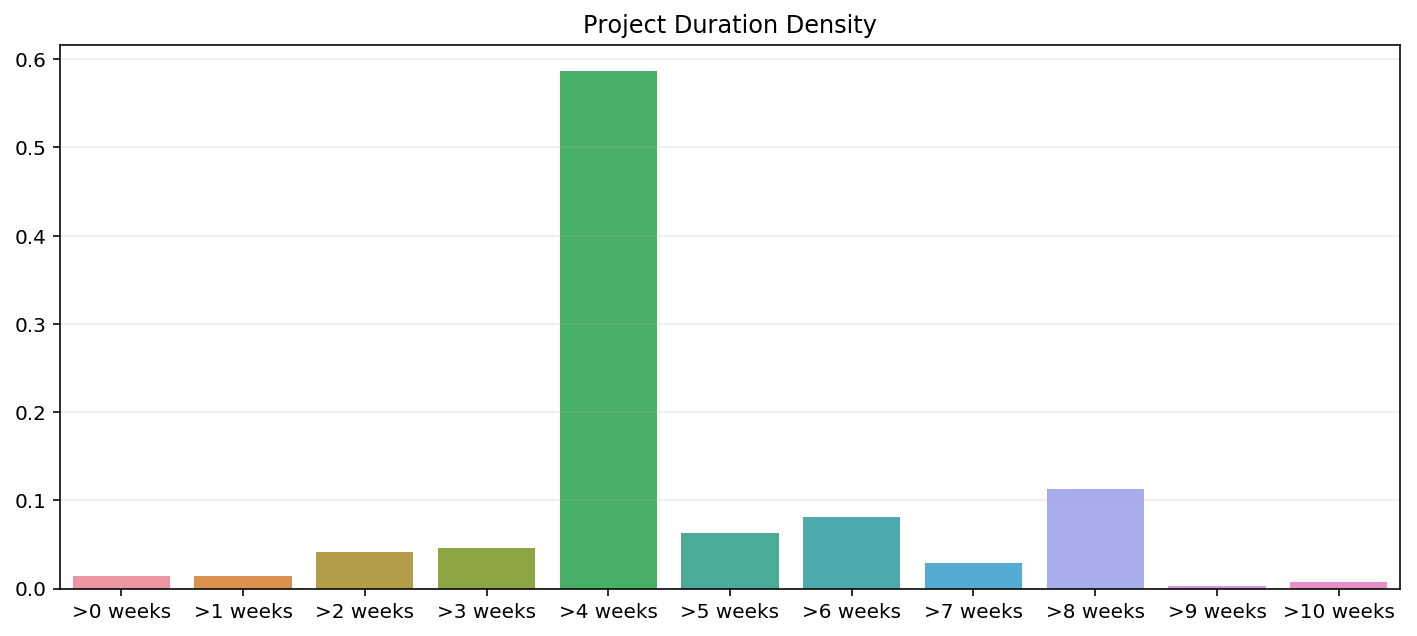

In [9]:
plt.subplots(figsize=(12,5))
td = pd.Series([ pd.Timedelta(days=i) for i in range(0, 92, 7)])
r = pd.cut(pd.TimedeltaIndex(data['duration'], unit='s').to_series(), td, labels=False).value_counts()
g = sns.barplot(r.index, r.values / len(data))
g.set_xticklabels([f'>{int(w)} weeks' for w in td.dt.days / 7])
plt.grid(alpha=0.25, axis='y')
plt.title('Project Duration Density');

### Launch Month Density

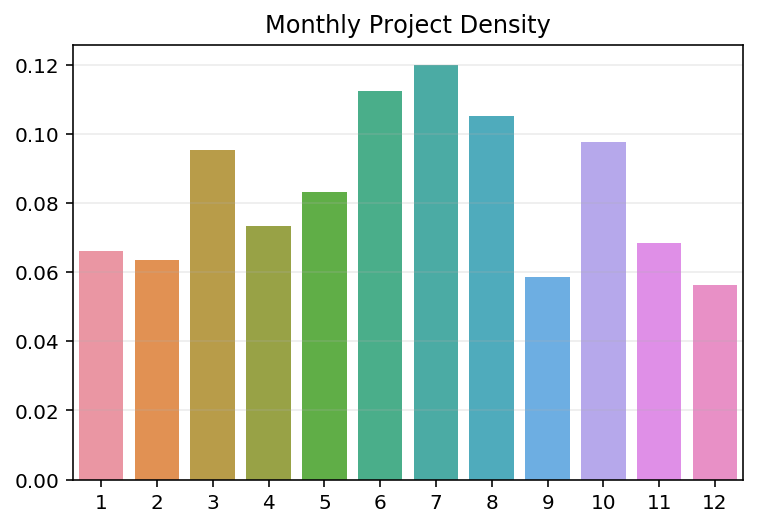

In [10]:
vc = data['month'].value_counts() / len(data)
sns.barplot(vc.index, vc.values)
plt.grid(alpha=0.25, axis='y')
plt.title('Monthly Project Density');

## Dependent Variables to Focus on

 - Pledged to Goal
  - Focused mainly around 0 and 1-2, with some outliers after 2
 - Mean Donation
  - Looks like some parameterization of a gamma distribution
 - Status (success or failure)
  - Logistic Regression
 - Backers
  - Long tailed Poisson
  
### Examine Outliers

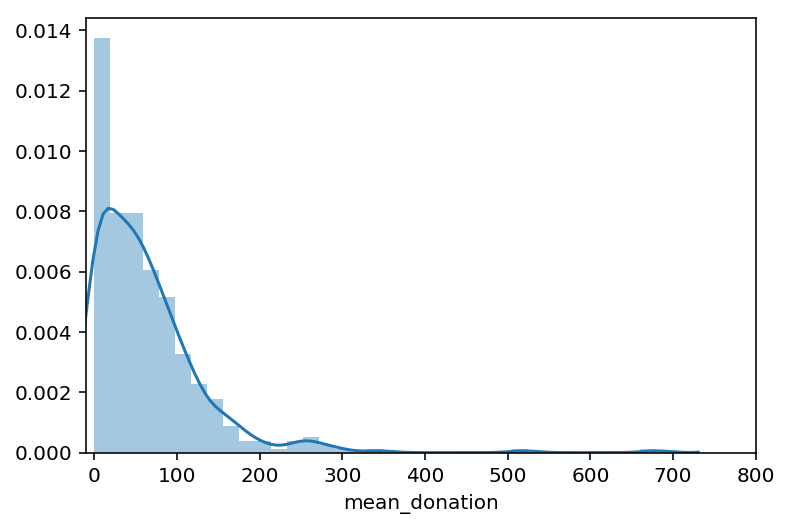

In [14]:
sns.distplot(data['mean_donation'])
plt.xlim([-10, 800]);

In [15]:
data.loc[data['mean_donation'] > 300]

,id,name,blurb,created,launched,deadline,goal,spotlight,staff_pick,status,status_changed_at,backers,usd_pledged,pledged,currency,current_currency,category,geo_country,geo_state,geo_type,url,text,mean_donation,text_length_words,text_length_sentences,pledged_to_goal,duration,duration_float,month,day_of_week,year,from_US,from_Town,blurb_length_words,battle_metaphor,journey_metaphor,battle_uniques,journey_uniques,battle_salience,journey_salience,battle_productivity,journey_productivity,dominant_battle,dominant_journey,dominant_both,dominant_neither,dominant
35,359128200,Stöd berättelserna om cancer som hjälper andra,Cancerpodden - Anna Benson möter läkare och fo...,1497801645,1497990193,1503174193,50000,False,False,0,1503174193,1,344.703270,3000.0,SEK,USD,publishing,SE,Stockholm,Town,https://www.kickstarter.com/projects/265847814...,Att producera Cancerpodden kostar 3000 kronor ...,344.703270,346,21,0.060000,5184000,60.0,6,1,2017,0,1,22,0,0,0,0,0.000000,0.0,0.0,0.0,0,0,0,1,Neither
306,1951561426,KNOCKING ON HEAVENS DOOR: A FILM NOIR FEATURE,Alex is a black ops soldier. He possesses the ...,1463687261,1466124952,1471308952,25000,True,False,1,1471308952,29,19704.445046,25329.0,CAD,USD,film & video,CA,ON,Town,https://www.kickstarter.com/projects/777006802...,Alex Rowe (Jeff Ellenberger) is a black ops so...,679.463622,1418,61,1.013160,5184000,60.0,6,4,2016,0,1,24,0,0,0,0,0.000000,0.0,0.0,0.0,0,0,0,1,Neither
364,1201395817,ChemoHead,"""ChemoHead"" is a film about the relationship b...",1421369959,1422081391,1424673391,55000,False,False,0,1424673392,10,5189.000000,5189.0,USD,USD,film & video,US,MO,Town,https://www.kickstarter.com/projects/206358583...,"If that word doesn't scare you now, it will so...",518.900000,806,51,0.094345,2592000,30.0,1,5,2015,1,1,13,1,0,1,0,0.001241,0.0,1.0,0.0,1,0,0,0,Battle


There are three projects with mean donation above $300 per donor. Except for maybe the first one there, they all look legit. The second one was even featured with a Spotlight position.

(-0.2, 10.5)

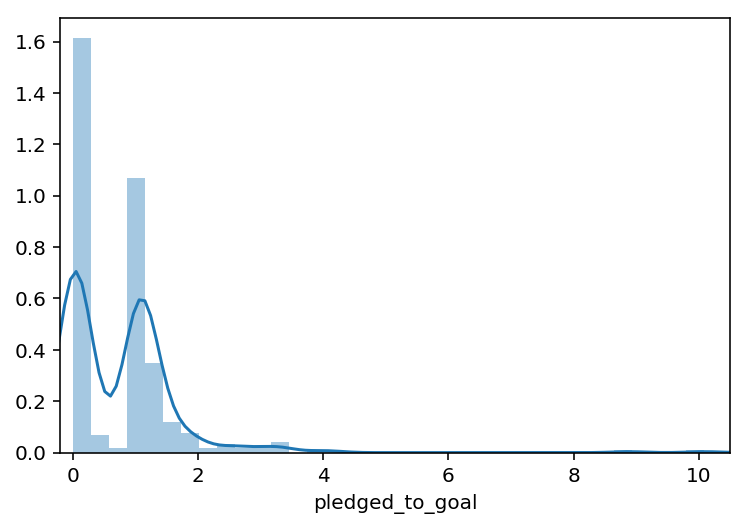

In [17]:
sns.distplot(data['pledged_to_goal'])
plt.xlim([-0.2, 10.5])

In [18]:
data.loc[data['pledged_to_goal'] > 4]

,id,name,blurb,created,launched,deadline,goal,spotlight,staff_pick,status,status_changed_at,backers,usd_pledged,pledged,currency,current_currency,category,geo_country,geo_state,geo_type,url,text,mean_donation,text_length_words,text_length_sentences,pledged_to_goal,duration,duration_float,month,day_of_week,year,from_US,from_Town,blurb_length_words,battle_metaphor,journey_metaphor,battle_uniques,journey_uniques,battle_salience,journey_salience,battle_productivity,journey_productivity,dominant_battle,dominant_journey,dominant_both,dominant_neither,dominant
141,1707749521,For the Dexterous Colourist (Cancer Fundraiser),Ingrid is offering adult colouring pages to as...,1471714584,1471913999,1473209999,500,True,False,1,1473209999,41,1596.450816,2054.00,CAD,USD,art,CA,NS,Town,https://www.kickstarter.com/projects/79797116/...,IMPORTANT NOTE: This Kickstarter Project is fo...,38.937825,277,16,4.108000,1296000,15.000000,8,1,2016,0,1,19,1,0,1,0,0.003610,0.0,1.0,0.0,1,0,0,0,Battle
226,425105602,Comedian Dying of Cancer Hopes to Make a Stand...,"Quincy Jones, stand-up comic, has one dying wi...",1455559253,1456032931,1458345600,4985,True,True,1,1458345600,1204,50273.280000,50273.28,USD,USD,film & video,US,CA,Town,https://www.kickstarter.com/projects/204327507...,Two years ago I hurried home from my meaningle...,41.755216,1591,104,10.084911,2312669,26.767002,2,6,2016,1,1,24,1,0,1,0,0.000629,0.0,1.0,0.0,1,0,0,0,Battle
304,1579740363,Poems from my year of breast cancer- time to p...,Poetry got me through this year of cancer trea...,1531089402,1531828656,1534420656,1500,True,True,1,1534420657,321,13311.000000,13311.00,USD,USD,publishing,US,TN,Town,https://www.kickstarter.com/projects/177890768...,"Trauma is pre-verbal, according to The Body Ke...",41.467290,955,56,8.874000,2592000,30.000000,7,1,2018,1,1,19,0,0,0,0,0.000000,0.0,0.0,0.0,0,0,0,1,Neither


All look pretty legit.

Confirming the pledged to goal ratios and mean donations for projects that succeed and fail:

In [29]:
print(data.groupby('status')['pledged'].sum() / data.groupby('status')['goal'].sum())
print(data.groupby('status')['usd_pledged'].sum() / data.groupby('status')['backers'].sum())

status
0    0.016477
1    1.264030
dtype: float64
status
0    60.164326
1    75.495179
dtype: float64


Overlapping histograms of the text length in words for failing and succeeding projects. This later comes up as important effect in the model.

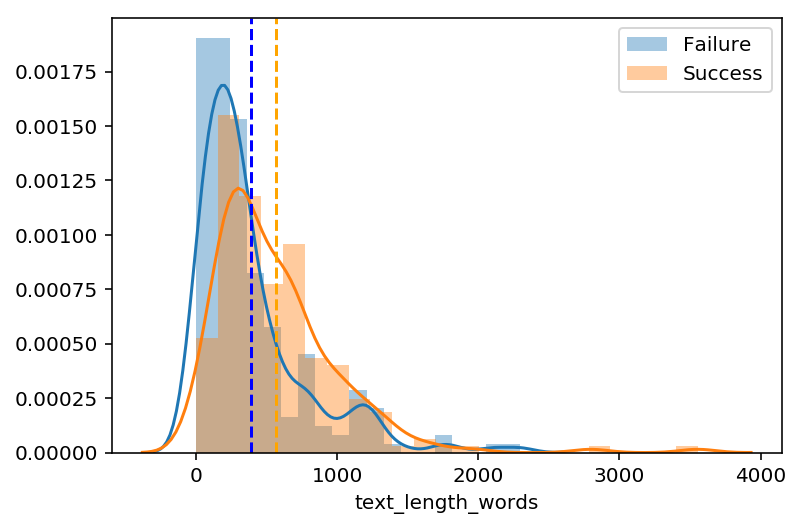

In [28]:
sns.distplot(data.loc[data['status'] == 0, 'text_length_words'], label='Failure')
g = sns.distplot(data.loc[data['status'] == 1, 'text_length_words'], label='Success')
g.axvline(data.loc[data['status'] == 1, 'text_length_words'].mean(), c='orange', linestyle='--')
g.axvline(data.loc[data['status'] == 0, 'text_length_words'].mean(), c='blue', linestyle='--')
plt.legend();

Comparing goal amounts between fail/success. Looking at mean, which is skewed a bit, so also median.

In [32]:
data.groupby('status')['goal'].mean(), data.groupby('status')['goal'].quantile(0.5)

(status
 0    32721.935000
 1     9268.755981
 Name: goal, dtype: float64, status
 0    6000.0
 1    5000.0
 Name: goal, dtype: float64)

In [35]:
data_post2010 = data.loc[data['year'] > 2010, :]

In [36]:
print(data_post2010.groupby('year')['pledged'].sum() / data_post2010.groupby('year')['goal'].sum())
print(data_post2010.groupby('year')['usd_pledged'].sum() / data_post2010.groupby('year')['backers'].sum())

year
2011    0.968363
2012    1.201871
2013    0.849756
2014    0.189243
2015    0.153775
2016    0.270711
2017    0.172016
2018    0.603106
dtype: float64
year
2011     77.620207
2012     70.230593
2013     79.961930
2014     55.465974
2015     97.261034
2016     73.386609
2017     86.274929
2018    101.655851
dtype: float64


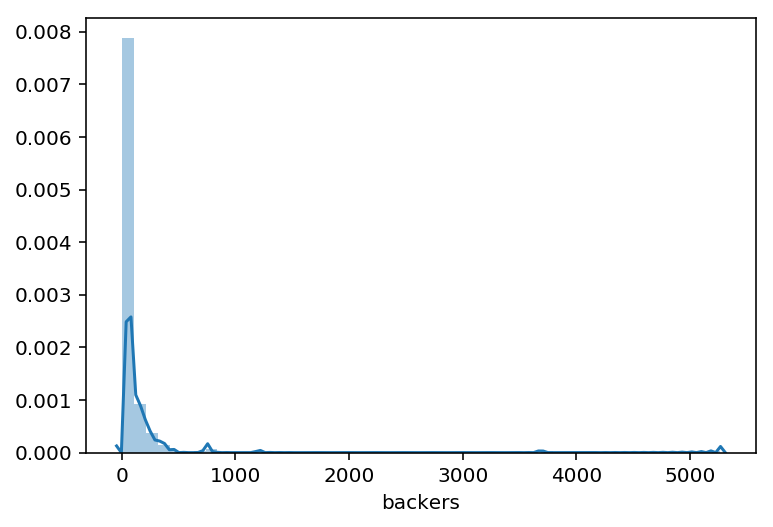

In [48]:
sns.distplot(data['backers'])

In [49]:
data.loc[data['backers'] > 1000]

,id,name,blurb,created,launched,deadline,goal,spotlight,staff_pick,status,status_changed_at,backers,usd_pledged,pledged,currency,current_currency,category,geo_country,geo_state,geo_type,url,text,mean_donation,text_length_words,text_length_sentences,pledged_to_goal,duration,duration_float,month,day_of_week,year,from_US,from_Town,blurb_length_words,battle_metaphor,journey_metaphor,battle_uniques,journey_uniques,battle_salience,journey_salience,battle_productivity,journey_productivity,dominant_battle,dominant_journey,dominant_both,dominant_neither,dominant
218,981149095,"""Be Here Now"" – The Andy Whitfield Story",Inspiring documentary about Andy Whitfield who...,1336147853,1339185851,1343073851,200000,True,False,1,1343073852,5265,302810.91,302810.91,USD,USD,film & video,AU,NSW,Town,https://www.kickstarter.com/projects/426354716...,There is Now Less Than 3 Hours to go of the Ca...,57.513943,1957,46,1.514055,3888000,45.000000,6,4,2012,0,1,21,5,0,4,0,0.002555,0.0,0.8,0.0,1,0,0,0,Battle
226,425105602,Comedian Dying of Cancer Hopes to Make a Stand...,"Quincy Jones, stand-up comic, has one dying wi...",1455559253,1456032931,1458345600,4985,True,True,1,1458345600,1204,50273.28,50273.28,USD,USD,film & video,US,CA,Town,https://www.kickstarter.com/projects/204327507...,Two years ago I hurried home from my meaningle...,41.755216,1591,104,10.084911,2312669,26.767002,2,6,2016,1,1,24,1,0,1,0,0.000629,0.0,1.0,0.0,1,0,0,0,Battle
335,298763592,"That Dragon, Cancer",A videogame developer's love letter to his son...,1413595915,1415812788,1418436000,85000,True,True,1,1418436012,3687,104491.16,104491.16,USD,USD,crafts_games,US,IA,Town,https://www.kickstarter.com/projects/numinousg...,"""A poetic, emotionally intense story of love i...",28.340429,441,19,1.229308,2623212,30.361250,11,2,2014,1,1,25,2,0,2,0,0.004535,0.0,1.0,0.0,1,0,0,0,Battle


All three seem legit, therefore it would be artificially limiting the data to cut these out. Note that only about once every two years is there a project with more than 1,000 backers.